<a href="https://colab.research.google.com/github/NimishPrakash/IBM-Data-Analyst-Capstone-Project/blob/main/5_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the dataset into a dataframe.


In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [4]:
df.head().T

,0,1,2,3,4
Respondent,4,9,13,16,17
MainBranch,I am a developer by profession,I am a developer by profession,I am a developer by profession,I am a developer by profession,I am a developer by profession
Hobbyist,No,Yes,Yes,Yes,Yes
OpenSourcer,Never,Once a month or more often,Less than once a month but more than once per ...,Never,Less than once a month but more than once per ...
OpenSource,The quality of OSS and closed source software ...,The quality of OSS and closed source software ...,"OSS is, on average, of HIGHER quality than pro...",The quality of OSS and closed source software ...,The quality of OSS and closed source software ...
...,...,...,...,...,...
Sexuality,Straight / Heterosexual,Bisexual,Straight / Heterosexual,Straight / Heterosexual,Straight / Heterosexual
Ethnicity,White or of European descent,White or of European descent,White or of European descent,White or of European descent,Hispanic or Latino/Latina;Multiracial
Dependents,No,No,Yes,No,No
SurveyLength,Appropriate in length,Appropriate in length,Appropriate in length,Appropriate in length,Appropriate in length


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              11398 non-null  int64  
 1   MainBranch              11398 non-null  object 
 2   Hobbyist                11398 non-null  object 
 3   OpenSourcer             11398 non-null  object 
 4   OpenSource              11317 non-null  object 
 5   Employment              11398 non-null  object 
 6   Country                 11398 non-null  object 
 7   Student                 11347 non-null  object 
 8   EdLevel                 11286 non-null  object 
 9   UndergradMajor          10661 non-null  object 
 10  EduOther                11234 non-null  object 
 11  OrgSize                 11302 non-null  object 
 12  DevType                 11333 non-null  object 
 13  YearsCode               11389 non-null  object 
 14  Age1stCode              11385 non-null

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


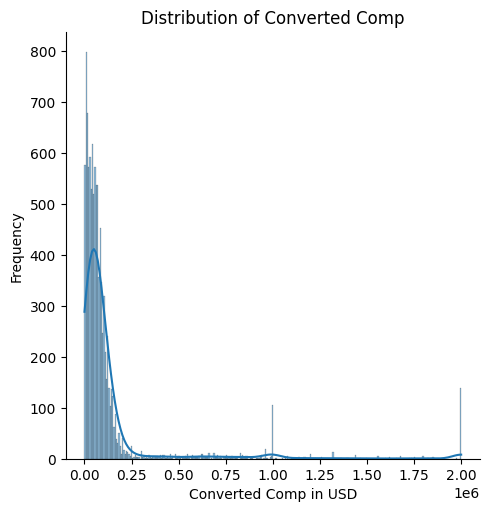

In [6]:
sns.displot(df['ConvertedComp'],kde=True)
plt.xlabel('Converted Comp in USD')
plt.ylabel('Frequency')
plt.title('Distribution of Converted Comp')
plt.show()

Plot the histogram for the column `ConvertedComp`.


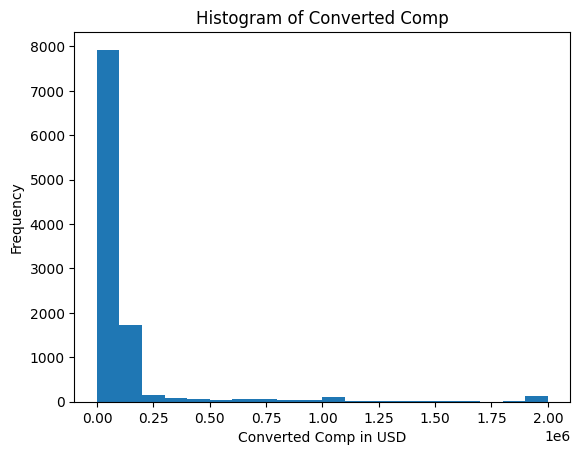

In [7]:
plt.hist(df['ConvertedComp'],bins=20)
plt.xlabel('Converted Comp in USD')
plt.ylabel('Frequency')
plt.title('Histogram of Converted Comp')
plt.show()

What is the median of the column `ConvertedComp`?


In [8]:
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [9]:
df.Gender.value_counts()

,count
Gender,
Man,10480
Woman,731
"Non-binary, genderqueer, or gender non-conforming",63
"Man;Non-binary, genderqueer, or gender non-conforming",26
"Woman;Non-binary, genderqueer, or gender non-conforming",14
Woman;Man,9
"Woman;Man;Non-binary, genderqueer, or gender non-conforming",2


In [10]:
# Number of Man Respondent
df[df['Gender']=='Man'].shape[0]

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [11]:
df[df['Gender']=='Woman']['ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [12]:
# min,q1,median,q3,max of a column are its five number summary
age_min = df.Age.min()
age_q1 = df.Age.quantile(0.25)
age_median = df.Age.median()
age_q3 = df.Age.quantile(0.75)
age_max = df.Age.max()

In [13]:
print("Minimum age:", age_min)
print("Q1 (25th percentile) age:", age_q1)
print("Median age:", age_median)
print("Q3 (75th percentile) age:", age_q3)
print("Maximum age:", age_max)

Minimum age: 16.0
Q1 (25th percentile) age: 25.0
Median age: 29.0
Q3 (75th percentile) age: 35.0
Maximum age: 99.0


Plot a histogram of the column `Age`.


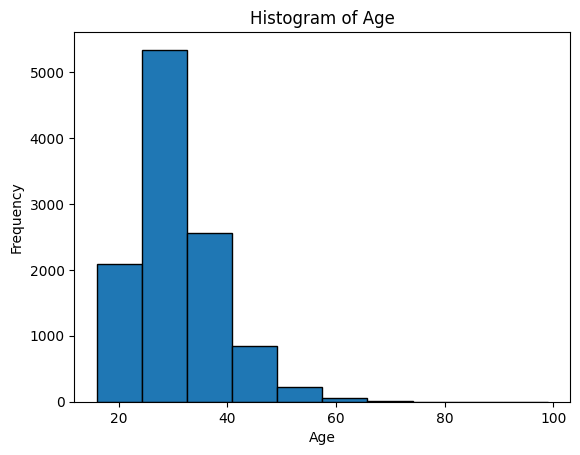

In [14]:
plt.hist(df['Age'],edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


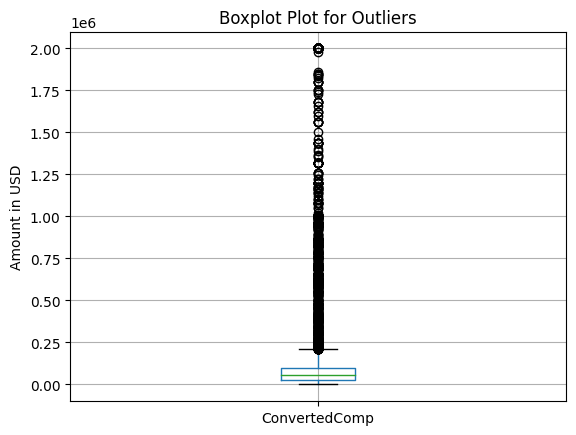

In [15]:
df.boxplot(column='ConvertedComp')
plt.ylabel('Amount in USD')
plt.title('Boxplot Plot for Outliers')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [16]:
# 25th and 75th percentiles
Q1 = df['ConvertedComp'].quantile(0.25)
Q2 = df['ConvertedComp'].quantile(0.50)
Q3 = df['ConvertedComp'].quantile(0.75)

# Interquartile range (IQR)
IQR = Q3 - Q1

print("Interquartile Range:", IQR)

Interquartile Range: 73132.0


In [17]:
# Median before removing outliers
print(Q2)

57745.0


Find out the upper and lower bounds.


In [18]:
# The upper and lower bounds
upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)

print("Upper Bound:", upper_bound)
print("Lower Bound:", lower_bound)

Upper Bound: 209698.0
Lower Bound: -82830.0


Number of Outliers below Q1

In [19]:
# Outliers below Q1
outliers_below_Q1 = df[df['Age'] < lower_bound]

# Number of outliers below Q1
num_outliers_below_Q1 = outliers_below_Q1.shape[0]

print('Number of outliers below Q1:',num_outliers_below_Q1)

Number of outliers below Q1: 0


Identify how many outliers are there in the `ConvertedComp` column.


In [20]:
outliers = df[(df['ConvertedComp'] > upper_bound) | (df['ConvertedComp'] < lower_bound)]
num_outliers = outliers.shape[0]

print("Number of Outliers:", num_outliers)

Number of Outliers: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [21]:
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Shape of the dataframe after removing outliers
df_no_outliers.shape

(9703, 85)

In [22]:
# Median after removing outliers
Q2 = df_no_outliers['ConvertedComp'].quantile(0.50)
print('Median:',Q2)

# Mean after removing outliers
mean = df_no_outliers['ConvertedComp'].mean()
print(f'Mean: {mean:.2f}')

Median: 52704.0
Mean: 59883.21


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [23]:
# Numerical columns from the DataFrame
numerical_df = df.select_dtypes(include=['number'])

correlation = numerical_df.corrwith(df['Age'])

print(correlation)

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
